# Code to run and plot PCA

In [31]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt

import socket
import os as os
import sys as sys
import multiprocessing as mp
import itertools as it
from time import time

# For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

compute-a-16-114.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 32
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


In [32]:
def remove_individuals(df, remove_list=["_d"], iid_col="iid"):
    """Remove indivdiuals from PCA dataframe"""
    idx = df[iid_col].str.contains("|".join(remove_list))
    df = df[~idx].copy()
    print(f"Filtering to {len(df)}/{len(idx)}")
    return df

def get_sub_iid(df, pops=[""], iid_col="iid"):
    """Remove indivdiuals from PCA dataframe"""
    idx = df[iid_col].str.contains("|".join(pops))
    df = df[idx].copy()
    print(f"Found: {len(df)}/{len(idx)}")
    return df

def get_sub_pops(df, pop_list=[], pop_col="pop"):
    """Get Sub Populations"""
    idx = df[pop_col].str.contains("|".join(pop_list))
    df = df[idx].copy()
    print(f"Found: {len(df)}/{len(idx)}")
    return df

def get_sub_pops_exact(df, pop_list=[], pop_col="pop"):
    """Get Sub Populations"""
    idx = df[pop_col].isin(pop_list)
    df = df[idx].copy()
    print(f"Found: {len(df)}/{len(idx)}")
    return df

####################################################
### Plotting PCA

def plot_pca(ax, df, c="gray", alpha=1.0, legend="", marker="o",
             s=30, ec=None, text=False):
    """Plot PCA onto Axis"""
    ax.scatter(-df["pc1"], df["pc2"], c=c, alpha=alpha, label=legend, 
               ec=ec, s=s, marker=marker)
    if text:
        x, y = -df["pc1"].values, df["pc2"].values
        for i, txt in enumerate(df["iid"]):
            ax.annotate(txt, (x[i], y[i]), ha="left", va="bottom", c=c)
            
def plot_pca_ho(ax, df, c="gray", alpha=1.0, legend="", marker="o",
                s=30, ec=None, text=False):
    """Plot PCA onto Axis"""
    ax.scatter(-df["pc1"], df["pc2"], c=c, alpha=alpha, label=legend, 
               ec=ec, s=s, marker=marker)
    if text:
        x, y = -df["pc1"].values, df["pc2"].values
        for i, txt in enumerate(df["iid"]):
            ax.annotate(txt[:3], (x[i], y[i]), ha="center", va="center")           

In [33]:
min_snp = 30000
path_pca = "./output/pca/v46/20210317.punic1.v46_HO.construct_WE_NA_PCA.shrinkmodeNO.evec.txt"
#path_pca = "./output/pca/v45/20201116.punic1.v45_HO.construct_WE_NA_PCA.shrinkmode.evec.txt"
path_meta = "/n/groups/reich/hringbauer/Data/v46.1.anno.csv"

df = pd.read_csv(path_pca, 
                 sep=r"\s+", skiprows=1, header=None)
df.columns=["iid", "pc1", "pc2", "pc3", "pc4", "pop"]
df = remove_individuals(df, remove_list=["_d"])

df_meta = pd.read_csv(path_meta, sep=",")
df2 = df_meta[["iid", "Master ID", "loc", "n_cov_snp", "mean_cov", "sex", "age"]]
df = pd.merge(df, df2, on="iid", how="left")
idx = (df["n_cov_snp"]<min_snp)
df = df[~idx]
df.loc[df["loc"].isnull(), "loc"]="not assigned"
print(f"Filtered to {len(df)} Individuals based on Min SNP: {min_snp}")

df = df.sort_values(by="n_cov_snp", ascending=False)
dup = (df["Master ID"].duplicated() & ~df["Master ID"].isnull())
df = df[~dup].copy().reset_index(drop=True)
print(f"Filtered to {len(df)} based on duplicates")

Filtering to 1860/1874
Filtered to 1822 Individuals based on Min SNP: 30000
Filtered to 1770 based on duplicates


In [35]:
### Play with pulling out sample
df[df["pop"].str.contains("Italy_Sicily_Punic")]["pop"].value_counts()

Italy_Sicily_Punic              48
Italy_Sicily_Punic_oLevant       3
Italy_Sicily_Punic_oEurope       2
Italy_Sicily_Punic_oEuropean     2
Italy_Sicily_Punic_oNearEast     1
Name: pop, dtype: int64

### Get PCA populations

In [36]:
df_ho = get_sub_pops_exact(df, pop_list=["construct_WE_NA_PCA"])
df_is = get_sub_pops_exact(df, pop_list=["Israel_MLBA"])
#df_le = get_sub_pops_exact(df, pop_list=["Lebanon_MB"])
df_isp = get_sub_pops_exact(df, pop_list=["Israel_Phoenician"])

df_sard = get_sub_pops_exact(df, pop_list=["Italy_Sardinia_Punic"])
#df_sard_ba = get_sub_pops_exact(df, pop_list=["Italy_Sardinia_EBA","Italy_Sardinia_BA_Nuragic"])

df_tun = get_sub_pops_exact(df, pop_list=["Tunisia_N"])
df_vil = get_sub_iid(df, ["VIL"])
df_msr = get_sub_iid(df, ["MSR"])

df_cad = get_sub_iid(df, ["I12517|I15434|I8135"])

df_greek = get_sub_pops_exact(df, pop_list=["Greece_BA_Mycenaean"])
df_alg = get_sub_pops_exact(df, pop_list=["Algeria_IA"])
df_spain = get_sub_pops_exact(df, pop_list=["Spain_IA"])

df_vill = get_sub_pops(df, pop_list=["Villaricos"], pop_col="loc")
df_ib = get_sub_pops_exact(df, ["Ibiza_Punic.SG"])
#df_sic = get_sub_pops_exact(df, ["Italy_Phoenician_Sicily"])
df_sic2 = get_sub_pops_exact(df, ["Italy_Sicily_Punic"])
df_sic_ia = get_sub_pops_exact(df, ["Italy_Sicily_IA_Polizzello"])
df_sic_him = get_sub_pops(df, ["Sicily_Himera"])

df_eg_hell = get_sub_pops(df, ["Egypt_Hellenistic"])
df_eg_dyn = get_sub_pops(df, ["Egypt_Dynastic"])
#df_meno = get_sub_pops(df, ["Menorca"])
df_kerk = get_sub_pops(df, ["Tunisia_Pun"])

Found: 1132/1770
Found: 31/1770
Found: 13/1770
Found: 12/1770
Found: 9/1770
Found: 6/1770
Found: 2/1770
Found: 3/1770
Found: 13/1770
Found: 1/1770
Found: 21/1770
Found: 13/1770
Found: 1/1770
Found: 48/1770
Found: 19/1770
Found: 25/1770
Found: 2/1770
Found: 2/1770
Found: 29/1770


In [37]:
df_sic2["loc"].value_counts()

Sicily, Motya                                        11
Sicily, Birgi                                         9
Sicily, Marsala, Lilybaeum, Necropoli Monumentale     5
Sicily, Marsala                                       4
Sicily, Marsala, Lilybaeum, Tribunale                 4
Sicily, Selinunte, Manuzza                            4
Sicily, Marsala, Lilybaeum, via De Gasperi            3
Sicily, Palermo, Caserma Tukory                       3
Sicily, Palermo                                       2
Sicily, Marsala, Lilybaeum, via Gramsci               2
Sicily, Marsala, Lilybaeum, via Berta                 1
Name: loc, dtype: int64

### Sanity Check: Plot WestEurasia PCA

### v45 PCA

Found: 1196/1989


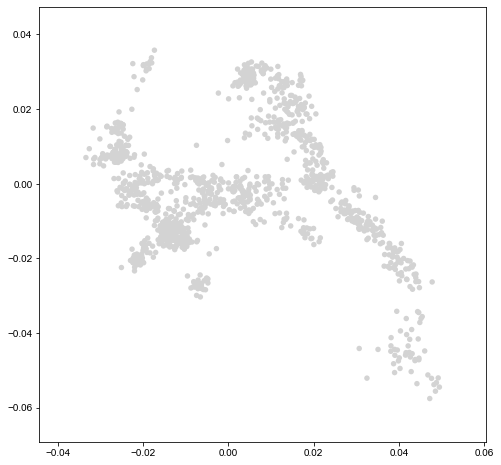

In [25]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
savepath=""
#savepath=""

df_ho = get_sub_pops_exact(df, pop_list=["construct_WE_NA_PCA"])
plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

### V46 PCA

Found: 1132/1770


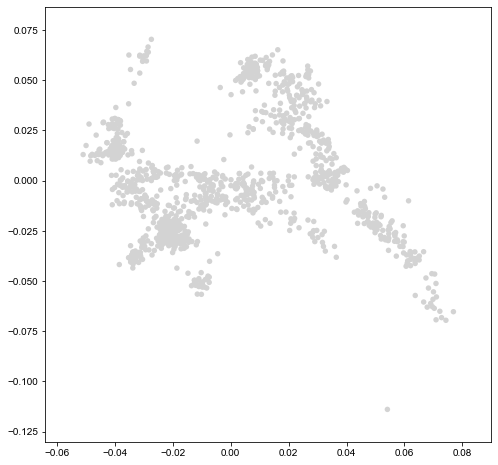

In [19]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
savepath=""
#savepath=""

df_ho = get_sub_pops_exact(df, pop_list=["construct_WE_NA_PCA"])
plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# Plot full PCA

Found: 1/1770


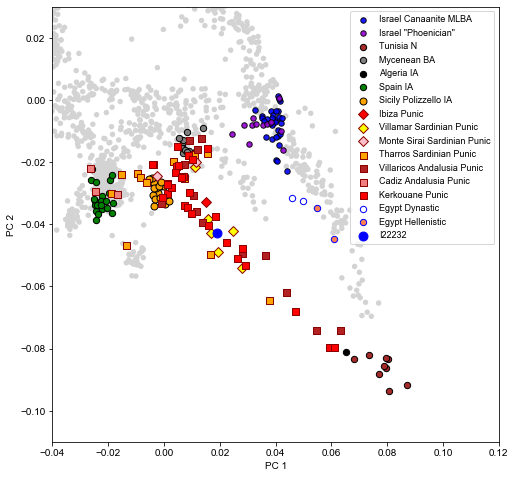

In [42]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
savepath="./figures/pca.v46/west_med_punic_pca.pdf"
savepath=""

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
#plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")

plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=49, ec="k")


#plot_pca(ax, df_meno, c="gold", legend="Menorca LBA", ec="k", s=49)

plot_pca(ax, df_ib, c="red", legend="Ibiza Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=49, marker="D")
plot_pca(ax, df_msr, c="pink", legend="Monte Sirai Sardinian Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_vill, c="firebrick", legend="Villaricos Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_cad, c="lightcoral", legend="Cadiz Andalusia Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_kerk, c="red", legend="Kerkouane Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_eg_dyn, c="w", legend="Egypt Dynastic", ec="blue", s=40, marker="o")
plot_pca(ax, df_eg_hell, c="coral", legend="Egypt Hellenistic", ec="blue", s=40, marker="o")

#plot_pca(ax, df_sic, c="w", legend="Sicilly Punic", ec="blue", s=70, marker="s")
#plot_pca(ax, df_sic2, c="coral", legend="Sicilly Punic2", ec="blue", s=70, marker="s")
#plot_pca(ax, df_sic_him, c="red", legend="Sicily Himera", s=90, marker="o", ec="k")

#plot_pca(ax, df_sic, c="k", legend="Sicilly Punic", ec="blue", s=70, marker=">")
#plot_pca(ax, df_sic2, c="coral", legend="Sicilly Punic2", ec="blue", s=70, marker=">")


df_iid = get_sub_iid(df, ["I22232"])
plot_pca(ax, df_iid, c="blue", legend="I22232", ec="blue", s=80, marker="o")


ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.04,0.12])
ax.set_ylim([-0.11,0.03])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

Saved to: ./figures/pca.v46/tharros.pdf


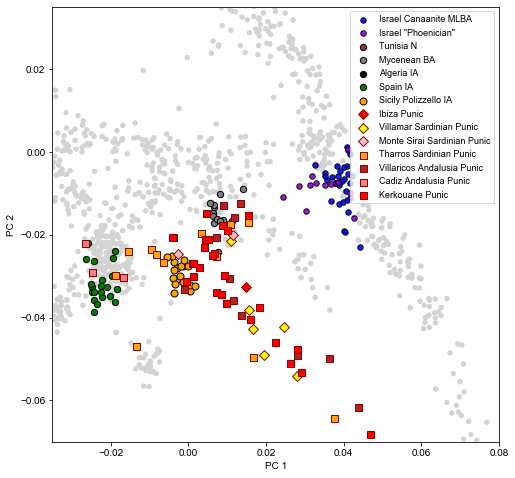

In [15]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
savepath="./figures/pca.v46/tharros.pdf"
#savepath=""

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
#plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")

plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=49, ec="k")


#plot_pca(ax, df_meno, c="gold", legend="Menorca LBA", ec="k", s=49)

plot_pca(ax, df_ib, c="red", legend="Ibiza Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=49, marker="D")
plot_pca(ax, df_msr, c="pink", legend="Monte Sirai Sardinian Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=49, marker="s", text=False)
#plot_pca(ax, df_sard1, c="orange", legend="Tharros Sardinian Roman/Punic", ec="red", s=49, marker="s", text=False)

plot_pca(ax, df_vill, c="firebrick", legend="Villaricos Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_cad, c="lightcoral", legend="Cadiz Andalusia Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_kerk, c="red", legend="Kerkouane Punic", ec="darkred", s=49, marker="s", text=False)

#plot_pca(ax, df_sic, c="w", legend="Sicilly Punic", ec="blue", s=70, marker="s")
#plot_pca(ax, df_sic2, c="coral", legend="Sicilly Punic2", ec="blue", s=70, marker="s")
#plot_pca(ax, df_sic_him, c="red", legend="Sicily Himera", s=90, marker="o", ec="k")

#plot_pca(ax, df_sic, c="k", legend="Sicilly Punic", ec="blue", s=70, marker=">")
#plot_pca(ax, df_sic2, c="coral", legend="Sicilly Punic2", ec="blue", s=70, marker=">")

ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.08])
ax.set_ylim([-0.07,0.035])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# Highlight Consanguineous Individuals

Found: 5/1977
Found: 3/1977
Found: 3/1977


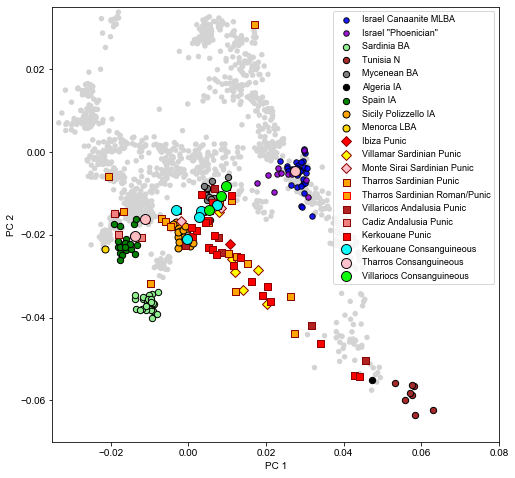

In [19]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
iid = "I24041|I24190|I24045|I24196|I24193"
iid2 = "I22121|I22119|I21964"
iid3 = "I18199|I18201|I18203"
savepath=f"./figures/pca.v45/consagnuineous_pca.pdf"
savepath=""

df_iid = get_sub_iid(df, [iid])
df_iid2 = get_sub_iid(df, [iid2])
df_iid3 = get_sub_iid(df, [iid3])

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")

plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=49, ec="k")


plot_pca(ax, df_meno, c="gold", legend="Menorca LBA", ec="k", s=49)
plot_pca(ax, df_ib, c="red", legend="Ibiza Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=49, marker="D")
plot_pca(ax, df_msr, c="pink", legend="Monte Sirai Sardinian Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_sard1, c="orange", legend="Tharros Sardinian Roman/Punic", ec="red", s=49, marker="s", text=False)

plot_pca(ax, df_vill, c="firebrick", legend="Villaricos Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_cad, c="lightcoral", legend="Cadiz Andalusia Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_kerk, c="red", legend="Kerkouane Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_iid, c="cyan", legend=f"Kerkouane Consanguineous", ec="k", alpha=0.95, s=100)
plot_pca(ax, df_iid2, c="pink", legend=f"Tharros Consanguineous", ec="k", alpha=0.95, s=100)
plot_pca(ax, df_iid3, c="lime", legend=f"Villariocs Consanguineous", ec="k", alpha=0.95, s=100)

ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.08])
ax.set_ylim([-0.07,0.035])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

Found: 3/1977


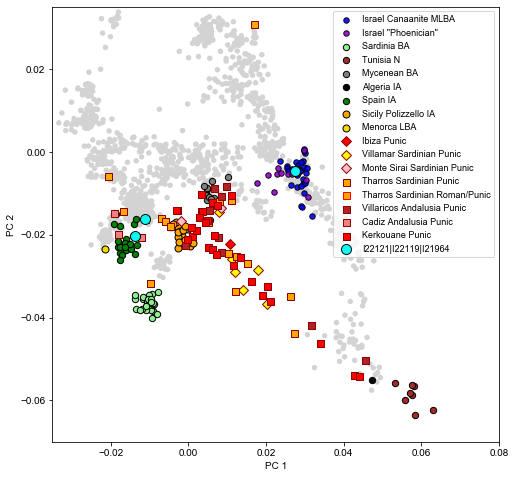

In [11]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
iid = "I22121|I22119|I21964"
#savepath=f"./figures/pca.v45/kerkouane_ROH_pca.pdf"
savepath=""

df_iid = get_sub_iid(df, [iid])

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")

plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=49, ec="k")


plot_pca(ax, df_meno, c="gold", legend="Menorca LBA", ec="k", s=49)
plot_pca(ax, df_ib, c="red", legend="Ibiza Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=49, marker="D")
plot_pca(ax, df_msr, c="pink", legend="Monte Sirai Sardinian Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_sard1, c="orange", legend="Tharros Sardinian Roman/Punic", ec="red", s=49, marker="s", text=False)

plot_pca(ax, df_vill, c="firebrick", legend="Villaricos Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_cad, c="lightcoral", legend="Cadiz Andalusia Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_kerk, c="red", legend="Kerkouane Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_iid, c="cyan", legend=f"{iid}", ec="k", alpha=0.95, s=100)

ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.08])
ax.set_ylim([-0.07,0.035])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [ ]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
iid = "I22121"
#savepath=f"./figures/pca.v45/kerkouane_ROH_pca.pdf"
savepath=""

df_iid = get_sub_iid(df, [iid])

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")

plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=49, ec="k")



plot_pca(ax, df_meno, c="gold", legend="Menorca LBA", ec="k", s=49)
plot_pca(ax, df_ib, c="red", legend="Ibiza Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=49, marker="D")
plot_pca(ax, df_msr, c="pink", legend="Monte Sirai Sardinian Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_sard1, c="orange", legend="Tharros Sardinian Roman/Punic", ec="red", s=49, marker="s", text=False)

plot_pca(ax, df_vill, c="firebrick", legend="Villaricos Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_cad, c="lightcoral", legend="Cadiz Andalusia Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_kerk, c="red", legend="Kerkouane Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_iid, c="cyan", legend=f"{iid}", ec="k", alpha=0.95, s=100)

ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.08])
ax.set_ylim([-0.07,0.035])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

In [ ]:
df_kerk.sort_values(by="pc2")

### Sicilly

Saved to: ./figures/pca.v46/pca_sicilly_punic.png


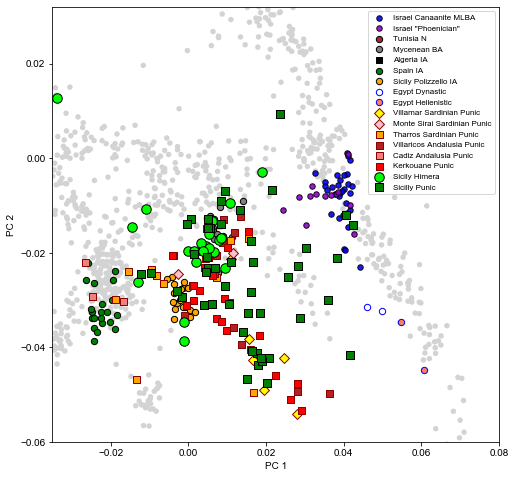

In [28]:
savepath="./figures/pca.v46/pca_sicilly_punic.png"

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca(ax, df_ho, c="lightgray")

plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
#plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, marker="s", ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")
plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=40, ec="k")

plot_pca(ax, df_eg_dyn, c="w", legend="Egypt Dynastic", ec="blue", s=40, marker="o")
plot_pca(ax, df_eg_hell, c="coral", legend="Egypt Hellenistic", ec="blue", s=40, marker="o")

#plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=50, marker="s")
#plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=50, marker="s")
#plot_pca(ax, df_msr, c="maroon", legend="Monte Sirai Sardinian Punic", ec="darkred", s=50, marker="s")

#plot_pca(ax, df_vill, c="red", legend="Andalusia Villaricos Punic", ec="darkred", s=50, marker="D")
#plot_pca(ax, df_ib, c="red", legend="Ibiza Punic", ec="sandybrown", s=70, marker="*")

#plot_pca(ax, df_sic, c="w", legend="Sicilly Punic", ec="blue", s=70, marker="s")
plot_pca(ax, df_vil, c="yellow", legend="Villamar Sardinian Punic", ec="darkred", s=49, marker="D")
plot_pca(ax, df_msr, c="pink", legend="Monte Sirai Sardinian Punic", ec="darkred", s=49, marker="D")

plot_pca(ax, df_sard, c="orange", legend="Tharros Sardinian Punic", ec="darkred", s=49, marker="s", text=False)

plot_pca(ax, df_vill, c="firebrick", legend="Villaricos Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_cad, c="lightcoral", legend="Cadiz Andalusia Punic", ec="darkred", s=49, marker="s", text=False)
plot_pca(ax, df_kerk, c="red", legend="Kerkouane Punic", ec="darkred", s=49, marker="s", text=False)


plot_pca(ax, df_sic_him, c="lime", legend="Sicily Himera", s=90, marker="o", ec="k")
plot_pca(ax, df_sic2, c="green", legend="Sicilly Punic", ec="k", s=70, marker="s")


ax.legend(loc="upper right", fontsize=8)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.08])
ax.set_ylim([-0.06,0.032])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()


In [ ]:
df_meta[df_meta["clst"].str.contains("Phoen")].sort_values(by="age")

# Plot context

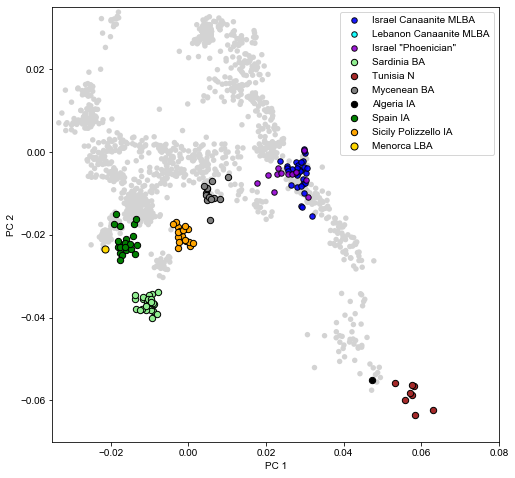

In [25]:
#savepath="./figures/pca/west_med_punic_pca.pdf"
savepath="./figures/pca/west_med_context.png"
savepath=""

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca_ho(ax, df_ho, c="lightgray", text=False)
plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)
plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")

plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=40, ec="k")

plot_pca(ax, df_meno, c="gold", legend="Menorca LBA", ec="k", s=50, marker="o")


#plot_pca(ax, df_sic, c="w", legend="Sicilly Punic", ec="blue", s=70, marker="s")
#plot_pca(ax, df_sic2, c="coral", legend="Sicilly Punic2", ec="blue", s=70, marker="s")
#plot_pca(ax, df_sic_him, c="red", legend="Sicily Himera", s=90, marker="o", ec="k")

#plot_pca(ax, df_sic, c="k", legend="Sicilly Punic", ec="blue", s=70, marker=">")
#plot_pca(ax, df_sic2, c="coral", legend="Sicilly Punic2", ec="blue", s=70, marker=">")

ax.legend(loc="upper right", fontsize=10)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.08])
ax.set_ylim([-0.07,0.035])

if len(savepath) > 0:
    plt.savefig(savepath, bbox_inches = 'tight', 
                pad_inches = 0, dpi=600)
    print(f"Saved to: {savepath}")
    
plt.show()

# Africa

In [43]:
### Play with pulling out sample
df[df["pop"].str.contains("Africa")]["pop"].value_counts()

Italy_Sardinia_Punic_oNAfrica          4
Italy_Sicily_unknown_oAfrican          2
Spain_Vandal_Visigoth_oAfrican1        2
Spain_Punic_oAfrican2                  2
Italy_Sicily_MBA_oAfrican              1
Spain_EBA_Africa_all                   1
Spain_Punic_Roman_oAfrican3            1
Italy_Sardinia_C_oAfrican              1
Tunisia_Punic_oAfrica                  1
Spain_Vandal_Visigoth_oAfrican2        1
Spain_BellBeaker_oAfrican              1
Italy_Sicily_LA_Jewish_oHighAfrican    1
Name: pop, dtype: int64

In [47]:
df_alg_IA = get_sub_pops(df, pop_list=["Algeria_IA"])
df_alg_N = get_sub_pops(df, pop_list=["Algeria_N"])
df_ibero_m = get_sub_pops(df, pop_list=["Morocco_Iberomaurusian"])
df_mor_EN = get_sub_pops(df, pop_list=["Morocco_EN"])
df_mor_LN = get_sub_pops(df, pop_list=["Morocco_LN"])
df_sar_afr = get_sub_pops_exact(df, pop_list=["Italy_Sardinia_C_oAfrican"])
df_spain_afr = get_sub_pops_exact(df, pop_list=["Spain_BellBeaker_oAfrican"])

Found: 1/1770
Found: 1/1770
Found: 7/1770
Found: 3/1770
Found: 3/1770
Found: 1/1770
Found: 1/1770


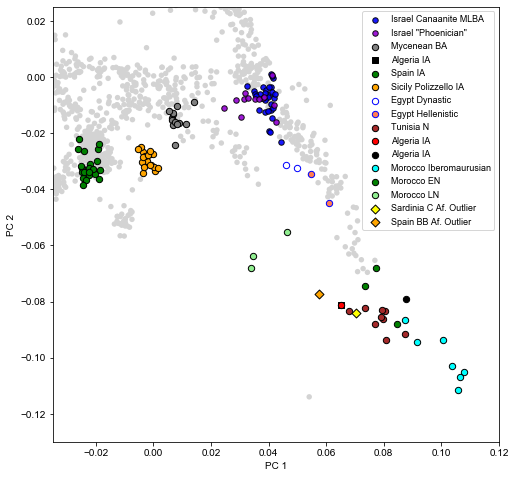

In [52]:
savepath="./figures/pca.v46/pca_afr_punic.png"

plt.figure(figsize=(8,8))
ax = plt.gca()

plot_pca(ax, df_ho, c="lightgray")

plot_pca(ax, df_is, c="blue", legend="Israel Canaanite MLBA", ec="k", alpha=0.9)
#plot_pca(ax, df_le, c="aqua", legend="Lebanon Canaanite MLBA", ec="k", alpha=0.9)
plot_pca(ax, df_isp, c="darkviolet", legend="Israel \"Phoenician\"", ec="k", alpha=0.9)
### Plot the Sardinian Samples
#plot_pca(ax, df_sard_ba, c="lightgreen", legend="Sardinia BA", ec="k", s=40)

plot_pca(ax, df_greek, c="gray", legend="Mycenean BA", ec="k", s=40)

plot_pca(ax, df_alg, c="k", legend="Algeria IA", s=40, marker="s", ec="k")
plot_pca(ax, df_spain, c="green", legend="Spain IA", s=40, ec="k")
plot_pca(ax, df_sic_ia, c="orange", legend="Sicily Polizzello IA", s=40, ec="k")

plot_pca(ax, df_eg_dyn, c="w", legend="Egypt Dynastic", ec="blue", s=40, marker="o")
plot_pca(ax, df_eg_hell, c="coral", legend="Egypt Hellenistic", ec="blue", s=40, marker="o")


plot_pca(ax, df_tun, c="brown", legend="Tunisia N", ec="k", s=40)
plot_pca(ax, df_alg_IA, c="red", legend="Algeria IA", ec="k", s=40)
plot_pca(ax, df_alg_N, c="k", legend="Algeria IA", ec="k", s=40)
plot_pca(ax, df_ibero_m, c="cyan", legend="Morocco Iberomaurusian", ec="k", s=40)
plot_pca(ax, df_mor_EN, c="green", legend="Morocco EN", ec="k", s=40)
plot_pca(ax, df_mor_LN, c="lightgreen", legend="Morocco LN", ec="k", s=40)
plot_pca(ax, df_sar_afr, c="yellow", legend="Sardinia C Af. Outlier", ec="k", s=40, marker="D")
plot_pca(ax, df_spain_afr, c="orange", legend="Spain BB Af. Outlier", ec="k", s=40, marker="D")

ax.legend(loc="upper right", fontsize=9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_xlim([-0.035,0.12])
ax.set_ylim([-0.13,0.025])

plt.show()



In [ ]:
df_isp.sort_values(by="pc2")

# Find close PCA matches

In [70]:
def return_pca_matches(df, iid="I22119",
                   pcs = ["pc1", "pc2", "pc3", "pc4"]):
    """Return matches in pc space to sample iid.
    Report sorted dataframe"""
    pc_t = df[df["iid"]==iid][pcs]
    diffs = df[pcs]-pc_t.values
    diff_sq = np.sum(diffs**2,axis=1)
    idx = diff_sq.sort_values().index
    return df.iloc[idx,:].copy()

In [ ]:
return_pca_matches(df, iid="I22125")[:10]

In [ ]:
return_pca_matches(df, iid="I18187")[:30]

In [36]:
idx

Int64Index([1952,  934,  149,  955,  948,  153,  954,  953,  947,  604,
            ...
            1457, 1454, 1458,   15,   22,   18, 1693, 1692, 1440, 1439],
           dtype='int64', length=1899)

### Area 51

In [23]:
df["iid"][df["iid"].str.contains("I22118")]

1956    I22118
Name: iid, dtype: object

In [ ]:
df1 = df[df["pop"].str.contains("Sic")]
df1["pop"].value_counts()

In [ ]:
df_sard

In [322]:
base_path = "/n/groups/reich/DAVID/V44/V44.0/v44.0_HO"
ind_path = base_path + ".ind"

df_ho = pd.read_csv(ind_path, delim_whitespace=True, header=None)
df_ho.columns=["iid", "sex", "clst"]
print(f"Loaded {len(df_ho)} Individuals")

Loaded 32828 Individuals


In [22]:
df_ho[df_ho["iid"].str.contains("I22118")]

,iid,pc1,pc2,pc3,pc4,pop,Master ID,n_cov_snp,mean_cov,sex


In [24]:
df_meta[df_meta["iid"].str.contains("I22118")]

,iid,Master ID,lat,lon,age,region,study,clst,mean_cov,n_cov_snp,avg_cov_snp,include_alt,family,sex
6834,I22118,I22118,39.873496,8.441024,2300.0,Italy,Unpublished,Italy_Sardinia_Punic,0.683903,820684,5.509,True,..,M
13391,I22118_d,I22118,39.873496,8.441024,2300.0,Italy,Unpublished,Italy_Sardinia_Punic,0.267762,321314,0.706,True,..,U


In [ ]:
df_meta